# FCS Tutoring Session 2

Welcome to our second exercise session. Today we are practicing our porgramming skills by implementing a card game. So let's get started :)

For any questions please contact me on Slack.

Janick Spirig, 05.03.2021

cards.png

## Card Game

Subsequently, we are going to implement a simple round-based card playing game.
In the end, two players should be able to play a card game against. In each round of the game the players compete against each other with the next card from their decks. The player with the card that accounts for the higher humber of points will win the current round. If the two cards have exactly the same number of points, the result is a draw. Once all rounds are played, the winner fo the overall game is determined.

But first, we have to set up our card deck...

### Setting up the card deck

First, we need to create our card deck. We will use a french card-set which contains:
*   Suits

Clubs, Diamonds, Hearts, Spades

*   Ranks

2, 3, 4, 5, 6, 7, 8, 9, 10, Jack, Queen, King, Ace





#### Create card deck

In [59]:
# let's write a function to create our card deck
# remember, our card deck should contain 52 cards in the end as we combine each rank with each suit: 4 (suits) * 13 (ranks) = 52 cards
# A card should have three attributes: "Rank of Suit", "Rank", "Suit" -> e.g. 2 of Clubs, 2, Clubs
# With which datatype can we represent a single card?
# With which datatype can we group all the cards together so that we have our complete card-deck?

# your code here
SUITS = ['Clubs', 'Diamonds', 'Hearts', 'Spades']
RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']


def createDeck():
    
    deck = []
    
    for suit in SUITS:
        for rank in RANKS:
            card = ["{} of {}".format(rank, suit), rank, suit]
            deck.append(card)
    
    return deck

In [60]:
# run the code below to create the deck
deck = createDeck()

#### Calcualte scores

In [17]:
# now once we have the card deck set up we need to calculate the score for each card and store this information in a separate place
# The score of a single card is the sum of its Suit score and the Rank score.
# For the Suits the following points should be assumed: Clubs = 1, Diamonds = 2, Hearts = 3, Spades = 4.
# For the Ranks the following points should be assumed: 1 = 1, 2 = 2, ..., Jack = 11, Queen = 12, King = 13, Ace = 14.
# For example: The score of the card 2 of Hearts is 2 + 3 = 5
# Which datatype can we use to store the card and its score?

# your code here

def calculateScores(deck):
    
    # we use a dictionary
    scores = {}
    for card in deck:
        suit_score = SUITS.index(card[2]) + 1
        rank_score = RANKS.index(card[1]) + 2
        scores[card[0]] = suit_score + rank_score
    return scores

In [20]:
# run the code below to calcualte the scores
scores = calculateScores(deck)

### Playing the game

Now when our card-deck exists and the scores have been calculated, we can start playing the game. Let's assume we want to give the players the flexibility to play the game for n rounds (with n.max == 26, as we have only 52 cards). First we need to shuffle our card-deck, then we can hand out each player n cards and then we can play the game for n rounds. After n rounds we check who has won more rounds.

#### Shuffle card deck

In [41]:
# Before we can hand out the cards we need to shuffle our deck
# When a human shuffles a card-deck he/she does it most likely randomly without a systematic approach. How can we incorporate this random component in our code?
import random
# your code here
def shuffleDeck(deck):
    
    n = len(deck)
    
    for i in range(len(deck)):

        j = random.randrange(i,n)
        deck[i], deck[j] = deck[j], deck[i]

    return deck
    
    

In [42]:
# run the statement below to test our shuffle function
deck_shuffled = shuffleDeck(deck)
print(deck_shuffled)

[['3 of Diamonds', '3', 'Diamonds'], ['2 of Hearts', '2', 'Hearts'], ['Jack of Clubs', 'Jack', 'Clubs'], ['6 of Diamonds', '6', 'Diamonds'], ['8 of Spades', '8', 'Spades'], ['4 of Clubs', '4', 'Clubs'], ['Queen of Hearts', 'Queen', 'Hearts'], ['5 of Diamonds', '5', 'Diamonds'], ['8 of Diamonds', '8', 'Diamonds'], ['King of Hearts', 'King', 'Hearts'], ['7 of Diamonds', '7', 'Diamonds'], ['5 of Hearts', '5', 'Hearts'], ['8 of Hearts', '8', 'Hearts'], ['Jack of Spades', 'Jack', 'Spades'], ['10 of Hearts', '10', 'Hearts'], ['King of Spades', 'King', 'Spades'], ['10 of Spades', '10', 'Spades'], ['3 of Spades', '3', 'Spades'], ['3 of Clubs', '3', 'Clubs'], ['2 of Diamonds', '2', 'Diamonds'], ['4 of Hearts', '4', 'Hearts'], ['6 of Clubs', '6', 'Clubs'], ['Jack of Diamonds', 'Jack', 'Diamonds'], ['Ace of Spades', 'Ace', 'Spades'], ['3 of Hearts', '3', 'Hearts'], ['4 of Diamonds', '4', 'Diamonds'], ['Ace of Hearts', 'Ace', 'Hearts'], ['10 of Diamonds', '10', 'Diamonds'], ['Queen of Diamonds', '

#### Hand out the cards

In [46]:
# In real life we hand out the cards in an alternate order -> card 1 goes to player x, card 2 to player y, card 3 to player x etc.
# In real life once all cards have been distributed the players have their own card decks which are kind of a sub-deck of the main deck
# So in our function we need to distributed n cards to both players because obviously in every round the players need a new card to play with and give back two card decks

# your code here

def handOut(deck, n):
    
    deck_player1 = []
    deck_player2 = []
    
    for card in deck[:n*2]:
        if deck.index(card) % 2:
            deck_player1.append(card)
        else:
            deck_player2.append(card)
    
    return deck_player1, deck_player2
            
    
    
    



In [56]:
# run the statement below to test our hand out function
n = 20
deck_player1, deck_player2 = handOut(deck_shuffled, n)
print(len(deck_player1), len(deck_player2))

20 20


#### Play a round

In [57]:
# Now once the player both have their card decks together, they can start playing
# Simultaneously the two players reveal the next card of their decks and compare the scores
# The card / player with he higher scores wins the current round. If the scores are equal the result is a draw
# NOTE: Here we want to have a generic function which allows us to play n repeating rounds. Remember: Same input, same process but different result in all rounds.
# Thus, the function should take two cards as parameters and give back the result of the current round

# your code here


def playRound(card1, card2):
    
    score_card1 = scores[card1[0]] 
    score_card2 = scores[card2[0]]
    
    if score_card1 > score_card2:
        res = 1
    elif score_card2 > score_card1:
        res = 2
    else:
        res = 0
        
    return res



In [61]:
print(deck)

[['2 of Clubs', '2', 'Clubs'], ['3 of Clubs', '3', 'Clubs'], ['4 of Clubs', '4', 'Clubs'], ['5 of Clubs', '5', 'Clubs'], ['6 of Clubs', '6', 'Clubs'], ['7 of Clubs', '7', 'Clubs'], ['8 of Clubs', '8', 'Clubs'], ['9 of Clubs', '9', 'Clubs'], ['10 of Clubs', '10', 'Clubs'], ['Jack of Clubs', 'Jack', 'Clubs'], ['Queen of Clubs', 'Queen', 'Clubs'], ['King of Clubs', 'King', 'Clubs'], ['Ace of Clubs', 'Ace', 'Clubs'], ['2 of Diamonds', '2', 'Diamonds'], ['3 of Diamonds', '3', 'Diamonds'], ['4 of Diamonds', '4', 'Diamonds'], ['5 of Diamonds', '5', 'Diamonds'], ['6 of Diamonds', '6', 'Diamonds'], ['7 of Diamonds', '7', 'Diamonds'], ['8 of Diamonds', '8', 'Diamonds'], ['9 of Diamonds', '9', 'Diamonds'], ['10 of Diamonds', '10', 'Diamonds'], ['Jack of Diamonds', 'Jack', 'Diamonds'], ['Queen of Diamonds', 'Queen', 'Diamonds'], ['King of Diamonds', 'King', 'Diamonds'], ['Ace of Diamonds', 'Ace', 'Diamonds'], ['2 of Hearts', '2', 'Hearts'], ['3 of Hearts', '3', 'Hearts'], ['4 of Hearts', '4', 'Hea

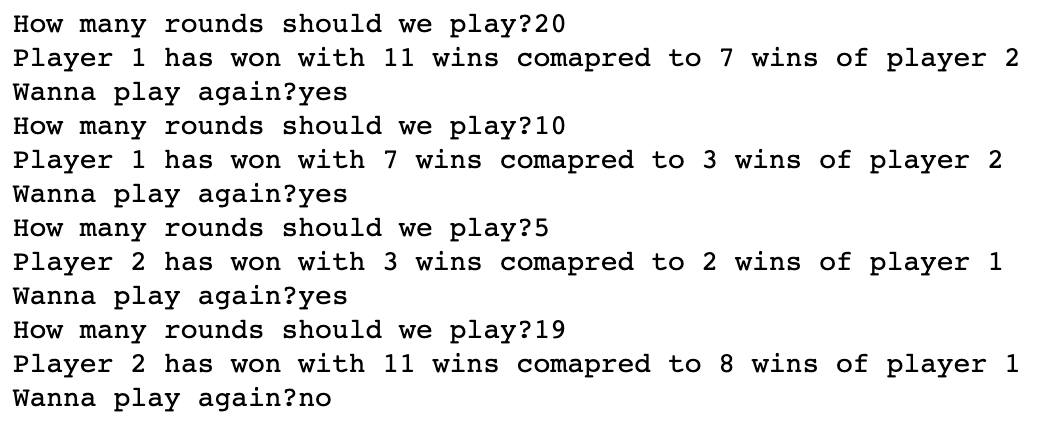

#### Play the game

In [64]:
# We have set up the card deck, distributed the cards and also set up a functionality to determine the result of a current round
# Now we want to start with the fun part by playing the actual game with n rounds
# First, we have to distribute the cards -> use the function we have set up above
# Then for each card in the players decks we play a round and track the result of each round
# Once, all rounds have been played we determine the winner
play = True
while play:
    
    # (1) shuffle the deck
    play_deck = shuffleDeck(deck)
    n = int(input("How many rounds should we play?"))

    # (2) hand out the cards which are necessary for n rounds
    play_deck1, play_deck2 = handOut(play_deck, n)

    # (3) play n rounds
    wins1 = 0
    wins2 = 0
    draws = 0

    for i in range(n):
        card1 = play_deck1[i]
        card2 = play_deck2[i]

        result = playRound(card1, card2)

        if result == 1:
            wins1 += 1
        elif result == 2:
            wins2 += 1
        else:
            draws += 1

    # (4) determine the winner and communicate the result
    if wins1 > wins2:
        print("Player 1 has won with {} wins comapred to {} wins of player 2".format(wins1, wins2))
    elif wins1 < wins2:
        print("Player 2 has won with {} wins comapred to {} wins of player 1".format(wins2, wins1))
    else:
        print("No winner!")

    # (6) Wanna play again?

    again = input("Wanna play again?")
    if not again == "yes":
        play = False

How many rounds should we play?20
Player 1 has won with 11 wins comapred to 7 wins of player 2
Wanna play again?yes
How many rounds should we play?10
Player 1 has won with 7 wins comapred to 3 wins of player 2
Wanna play again?yes
How many rounds should we play?5
Player 2 has won with 3 wins comapred to 2 wins of player 1
Wanna play again?yes
How many rounds should we play?19
Player 2 has won with 11 wins comapred to 8 wins of player 1
Wanna play again?no
